<a href="https://colab.research.google.com/github/yawpAI/colab/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf 
from sklearn.model_selection import train_test_split



In [34]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
type(X_train)

numpy.ndarray

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [40]:
X_train_scaled = X_train / 255.0
X_val_scaled = X_val / 255.0
X_test_scaled = X_test / 255.0

In [41]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)
print(X_val_scaled.shape)
print(y_val.shape)

(48000, 28, 28)
(48000,)
(10000, 28, 28)
(10000,)
(12000, 28, 28)
(12000,)


In [42]:
X_train_scaled[:10]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [43]:
model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=20)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5226 - accuracy: 0.8448 - val_loss: 0.1828 - val_accuracy: 0.9457
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1626 - accuracy: 0.9517 - val_loss: 0.1283 - val_accuracy: 0.9630
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1224 - accuracy: 0.9629 - val_loss: 0.1115 - val_accuracy: 0.9667
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0931 - accuracy: 0.9705 - val_loss: 0.1009 - val_accuracy: 0.9699
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0776 - accuracy: 0.9760 - val_loss: 0.0940 - val_accuracy: 0.9724
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0676 - accuracy: 0.9792 - val_loss: 0.0944 - val_accuracy: 0.9724
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0592 - accuracy: 0.9808 - val_loss: 0.0905 - val_accuracy:

In [44]:
model.evaluate(X_train_scaled, y_train)

1500/1500 [==============================] - 2s 1ms/step - loss: 0.0080 - accuracy: 0.9976


[0.007995941676199436, 0.9976041913032532]

In [45]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9786


[0.08887466043233871, 0.978600025177002]

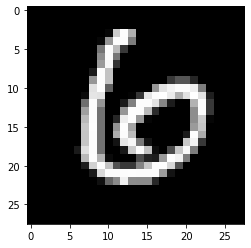

In [59]:
import matplotlib.pyplot as plt

plt.imshow(X_test[11], cmap='gray')

In [60]:
model.predict(X_test[11].reshape(1,28,28))

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [61]:
import numpy as np
pred = np.where(model.predict(X_test[11].reshape(1,28,28))[0] == 1)
pred[0][0]

6